In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import time

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 35)

In [4]:
data = pd.read_csv('/content/BrainTumorData.csv', index_col=False)
print("\n\n\nSample BrainTumor dataset head(5) :- \n\n", data.head(5) )




Sample BrainTumor dataset head(5) :- 

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0    842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119       

In [5]:
print("\n\n\nShape of the BrainTumor dataset  data.shape = ", end="")
print( data.shape)




Shape of the BrainTumor dataset  data.shape = (569, 32)


In [6]:
print("\n\n\nBrainTumor data decription : \n")
print( data.describe() )




BrainTumor data decription : 

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  texture_se  perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst   area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000     569.000000              569.000000  569.000000  569.000000    569.000000  569.000000     569.000000      569.000000    569.000000         569.000000   569.000000            569.000000    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000       569.000000      

In [7]:
print( "\n\n\ndata.diagnosis.unique() : " , data.diagnosis.unique() )




data.diagnosis.unique() :  ['M' 'B']


In [8]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})




After updation of  diagnosis feature: 
          id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0    842302          1        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119     

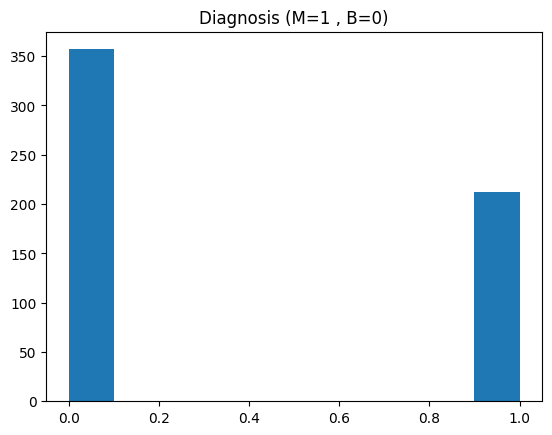




After id feature is set as row index: 
           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [9]:
print("\n\n\nAfter updation of  diagnosis feature: \n", data.head() )
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()
data = data.set_index('id')
print("\n\n\nAfter id feature is set as row index: \n", data)

In [10]:
print("\n\n\ndata.groupby('diagnosis').size()\n")
print(data.groupby('diagnosis').size())




data.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64


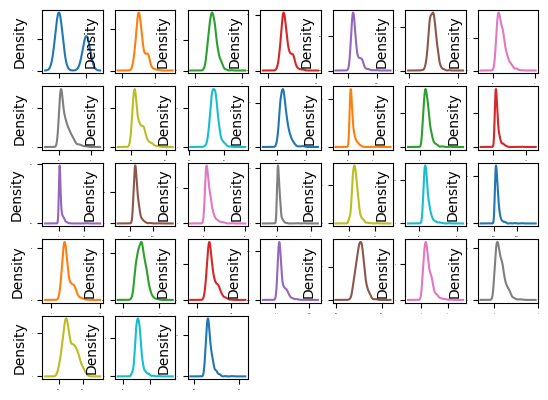

Text(0.5, 1.0, 'Cancer Attributes Correlation')

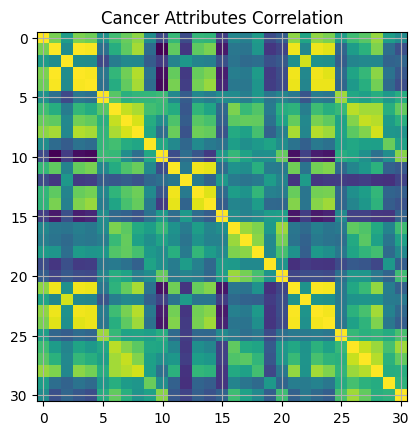

In [11]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(data.corr() )
ax1.grid(True)
plt.title('Cancer Attributes Correlation')

In [12]:
fig.colorbar(cax)
plt.show()

In [13]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
print(X.shape)
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.33, random_state=21)

(569, 30)
(569,)


In [14]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
num_folds = 10
results = []
names = []

In [16]:
for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=None)
    startTime = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    endTime = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), endTime-startTime))

CART: 0.908300 (0.042230) (run time: 0.165982)
SVM: 0.921457 (0.044890) (run time: 0.061948)
NB: 0.937112 (0.045642) (run time: 0.033776)
KNN: 0.916194 (0.064867) (run time: 0.379451)


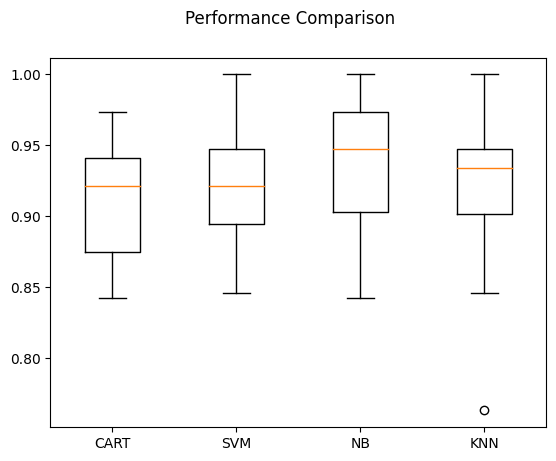

In [17]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
pipelines = []
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
results = []
names = []
print("\n\n\nAccuracies of algorithm after scaled dataset\n")




Accuracies of algorithm after scaled dataset



In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=None)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.918758 (0.041130) (run time: 0.064812)
ScaledSVM: 0.973752 (0.031138) (run time: 0.037595)
ScaledNB: 0.926518 (0.042084) (run time: 0.018298)
ScaledKNN: 0.955466 (0.038949) (run time: 0.060332)


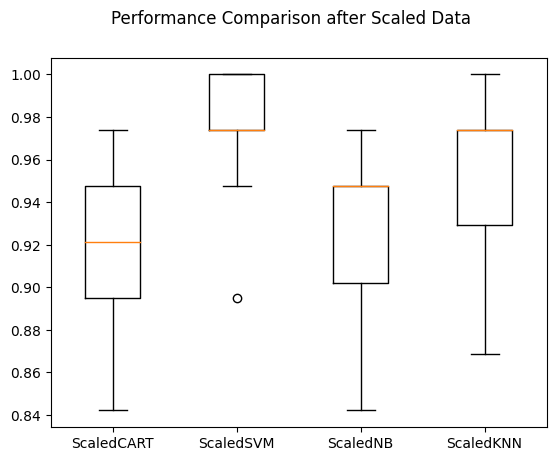

In [21]:
fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC()
start = time.time()
model.fit(X_train_scaled, Y_train)   #Training of algorithm
end = time.time()
print( "\n\nSVM Training Completed. It's Run Time: %f" % (end-start))



SVM Training Completed. It's Run Time: 0.010627


In [23]:
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
print("All predictions done successfully by SVM Machine Learning Algorithms")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))
print("\n\n")
print("confusion_matrix = \n")
print( confusion_matrix(Y_test, predictions))

All predictions done successfully by SVM Machine Learning Algorithms


Accuracy score 0.962766



confusion_matrix = 

[[116   2]
 [  5  65]]


In [24]:
import pickle

In [25]:
filename = 'braintumor_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open('braintumor_model.sav', 'rb'))